# Setup

### Import dependencies

In [1]:
import pandas as pd
import csv
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

### Set file locations

In [2]:
# file locations for import
# raw_data_file = "../00_data/raw_data/a70414_finishers.csv" # 2007 Brooklyn Half
# raw_data_file = "../00_data/raw_data/19nyc60_finishers.csv" # 2019 NYC 60K
# raw_data_file = "../00_data/raw_data/20WH5K_finishers.csv" # 2020 Washington Heights 5K
raw_data_file = "../00_data/geodata/19nyc60_finishers_geocoded.csv" # 2019 NYC 60K with geocoding
# raw_data_file = "../00_data/geodata/M2019_finishers_geocoded.csv" # 2019 NYC Marathon with geocoding

# file locations for export

# Import Data

### Import data from csv

In [3]:
df = pd.read_csv(raw_data_file)

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   375 non-null    object 
 1   geo_subregion          375 non-null    object 
 2   country                375 non-null    object 
 3   gender                 375 non-null    object 
 4   age                    375 non-null    int64  
 5   bib                    375 non-null    int64  
 6   team                   183 non-null    object 
 7   official_time          375 non-null    object 
 8   pace_per_mile          375 non-null    object 
 9   place_overall          375 non-null    int64  
 10  place_gender           375 non-null    int64  
 11  age_group              375 non-null    object 
 12  place_age-group        375 non-null    int64  
 13  country_group          375 non-null    object 
 14  place_country          375 non-null    int64  
 15  place_

In [5]:
if df.columns[0] == 'Unnamed: 0':
    df = df.drop(df.columns[0], axis=1)

In [6]:
df.head()

,name,geo_subregion,country,gender,age,bib,team,official_time,pace_per_mile,place_overall,...,time_age‐graded,percentage_age‐graded,net_time,net_place,long_country,address,full_address,location,latitude,longitude
0,Bobby Asher,"Bronx, NY",USA,M,34,275,Van Cortlandt TC,5:21:44,08:38,29,...,0:00:00,0%,5:21:44,29,United States,"Bronx, NY United States","The Bronx, Bronx County, New York, United States","(40.8466508, -73.8785937)",40.846651,-73.878594
1,Manuel Romero,"New York, NY",USA,M,48,292,Front Runners NY,5:58:35,09:38,75,...,0:00:00,0%,5:58:35,75,United States,"New York, NY United States","New York, United States","(40.7127281, -74.0060152)",40.712728,-74.006015
2,Pierre Rousseau,Montreal,CAN,M,56,53,NaN,5:26:59,08:47,35,...,0:00:00,0%,5:26:59,35,Canada,Montreal Canada,"Montréal, Agglomération de Montréal, Montréal ...","(45.4972159, -73.6103642)",45.497216,-73.610364
3,Deborah McDuffie-Saat,"New York, NY",USA,F,61,369,New York Flyers,7:49:42,12:36,265,...,0:00:00,0%,7:49:42,265,United States,"New York, NY United States","New York, United States","(40.7127281, -74.0060152)",40.712728,-74.006015
4,Robert Wilson,"Bronx, NY",USA,M,41,282,NaN,6:09:54,09:56,86,...,0:00:00,0%,6:09:54,86,United States,"Bronx, NY United States","The Bronx, Bronx County, New York, United States","(40.8466508, -73.8785937)",40.846651,-73.878594


### Manipulating time observations

In [7]:
df['official_time'] = pd.to_timedelta(df['official_time'])

In [8]:
# pd.to_timedelta needs arguments in the form 'HH:MM:SS', which means we need to add '00:' to the front of pace per mile
# times. This assumes a pace of less than 1 hour per mile, which is a safe assumption.
df['pace_per_mile'] = pd.to_timedelta('00:' + df['pace_per_mile'].astype(str))

In [9]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   375 non-null    object         
 1   geo_subregion          375 non-null    object         
 2   country                375 non-null    object         
 3   gender                 375 non-null    object         
 4   age                    375 non-null    int64          
 5   bib                    375 non-null    int64          
 6   team                   183 non-null    object         
 7   official_time          375 non-null    timedelta64[ns]
 8   pace_per_mile          375 non-null    timedelta64[ns]
 9   place_overall          375 non-null    int64          
 10  place_gender           375 non-null    int64          
 11  age_group              375 non-null    object         
 12  place_age-group        375 non-null    int64      

In [10]:
df.describe()

,age,bib,official_time,pace_per_mile,place_overall,place_gender,place_age-group,place_country,place_age‐graded,net_place,latitude,longitude
count,375.000000,375.000000,375,375,375.000000,375.000000,375.000000,375.000000,375.0,375.000000,374.000000,374.000000
mean,41.826667,252.490667,0 days 07:09:45.413333333,0 days 00:11:32.088000,188.000000,105.344000,15.330667,120.901333,0.0,188.000000,40.340645,-73.580829
std,10.204819,149.391204,0 days 01:21:40.535746367,0 days 00:02:11.457401408,108.397417,69.997987,11.826395,97.623189,0.0,108.397417,4.756100,10.178162
min,20.000000,1.000000,0 days 04:04:29,0 days 00:06:34,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,-22.905560,-122.391675
25%,34.000000,125.000000,0 days 06:13:53,0 days 00:10:02,94.500000,47.500000,5.000000,19.500000,0.0,94.500000,40.650104,-74.006946
50%,41.000000,244.000000,0 days 07:02:22,0 days 00:11:20,188.000000,94.000000,12.000000,113.000000,0.0,188.000000,40.712728,-73.959894
75%,48.000000,364.500000,0 days 07:56:58.500000,0 days 00:12:48,281.500000,158.500000,23.000000,206.500000,0.0,281.500000,40.789624,-73.900414
max,71.000000,532.000000,0 days 11:06:10,0 days 00:17:53,375.000000,252.000000,47.000000,300.000000,0.0,375.000000,53.522768,13.388860


<AxesSubplot:xlabel='age', ylabel='Density'>

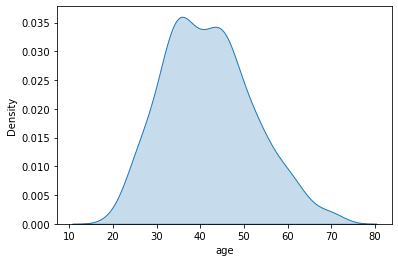

In [11]:
# Take a look at the runners' ages.
sns.kdeplot(df['age'], shade=True)

<AxesSubplot:ylabel='None'>

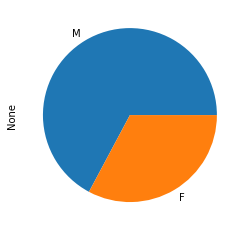

In [12]:
# Gender distribution?
gender_counts = pd.value_counts(df['gender'].values, sort=True)
gender_counts.plot.pie()

<AxesSubplot:xlabel='age', ylabel='Density'>

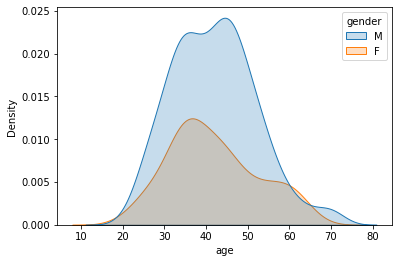

In [13]:
sns.kdeplot(df['age'], hue=df['gender'], shade=True)

<AxesSubplot:>

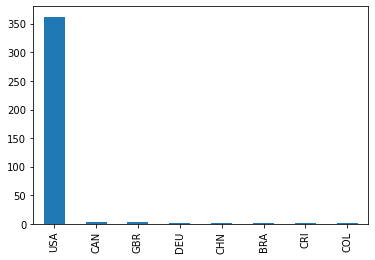

In [14]:
# What countries do the runners live in?
country_counts = pd.value_counts(df['country'].values, sort=True)
country_counts.plot.bar()

<AxesSubplot:ylabel='Frequency'>

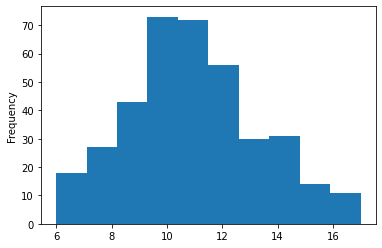

In [15]:
# How fast were they running?
df['pace_per_mile'].astype('timedelta64[m]').plot.hist()

<AxesSubplot:xlabel='pace_per_mile', ylabel='Density'>

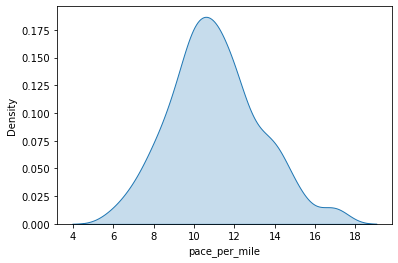

In [16]:
sns.kdeplot(df['pace_per_mile'].astype('timedelta64[m]'), shade=True)

<AxesSubplot:xlabel='pace_per_mile', ylabel='Density'>

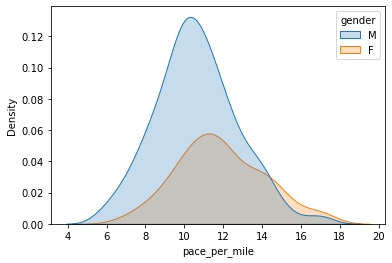

In [17]:
sns.kdeplot(df['pace_per_mile'].astype('timedelta64[m]'), hue=df['gender'], shade=True)

In [18]:
# Find official time for a specific finisher.
df.loc[df['name'] == 'Jack Craft']['official_time']

341   0 days 07:07:39
Name: official_time, dtype: timedelta64[ns]

In [19]:
# Find all finishers within a certain time window
test_window_df = df.loc[(df['official_time'] > pd.to_timedelta(5, unit = 'h'))\
                        & (df['official_time'] < pd.to_timedelta(6, unit = 'h'))]

test_window_df

,name,geo_subregion,country,gender,age,bib,team,official_time,pace_per_mile,place_overall,...,time_age‐graded,percentage_age‐graded,net_time,net_place,long_country,address,full_address,location,latitude,longitude
0,Bobby Asher,"Bronx, NY",USA,M,34,275,Van Cortlandt TC,0 days 05:21:44,0 days 00:08:38,29,...,0:00:00,0%,5:21:44,29,United States,"Bronx, NY United States","The Bronx, Bronx County, New York, United States","(40.8466508, -73.8785937)",40.846651,-73.878594
1,Manuel Romero,"New York, NY",USA,M,48,292,Front Runners NY,0 days 05:58:35,0 days 00:09:38,75,...,0:00:00,0%,5:58:35,75,United States,"New York, NY United States","New York, United States","(40.7127281, -74.0060152)",40.712728,-74.006015
2,Pierre Rousseau,Montreal,CAN,M,56,53,NaN,0 days 05:26:59,0 days 00:08:47,35,...,0:00:00,0%,5:26:59,35,Canada,Montreal Canada,"Montréal, Agglomération de Montréal, Montréal ...","(45.4972159, -73.6103642)",45.497216,-73.610364
5,Julio Avalos,"New York, NY",USA,M,38,183,West Side Y,0 days 05:31:40,0 days 00:08:54,39,...,0:00:00,0%,5:31:40,39,United States,"New York, NY United States","New York, United States","(40.7127281, -74.0060152)",40.712728,-74.006015
10,Farah Visslailli,"Brooklyn, NY",USA,F,34,309,South Central Brooklyn Runners,0 days 05:54:11,0 days 00:09:30,71,...,0:00:00,0%,5:54:11,71,United States,"Brooklyn, NY United States","Brooklyn, Kings County, New York, United States","(40.6501038, -73.9495823)",40.650104,-73.949582
12,Qiang Chen,"Syosset, NY",USA,M,52,352,Misty Mountain Runners,0 days 05:28:13,0 days 00:08:49,38,...,0:00:00,0%,5:28:13,38,United States,"Syosset, NY United States","Syosset, Oyster Bay, Nassau County, New York, ...","(40.818714150000005, -73.50015652837524)",40.818714,-73.500157
13,David Law,"Corona, NY",USA,M,32,273,Queens Distance Runners,0 days 05:52:50,0 days 00:09:28,66,...,0:00:00,0%,5:52:50,66,United States,"Corona, NY United States","Corona, Queens, Queens County, New York, 11368...","(40.7469593, -73.8601456)",40.746959,-73.860146
20,Conrado Bermudez,"Jersey City, NJ",USA,M,46,23,NaN,0 days 05:16:53,0 days 00:08:30,25,...,0:00:00,0%,5:16:53,25,United States,"Jersey City, NJ United States","Jersey City, Hudson County, New Jersey, United...","(40.7281575, -74.0776417)",40.728158,-74.077642
21,Prelja Sinistaj,"Kew Gardens, NY",USA,M,57,202,47 American Sign Language & English HS,0 days 05:36:52,0 days 00:09:03,48,...,0:00:00,0%,5:36:52,48,United States,"Kew Gardens, NY United States","Kew Gardens, Queens, Queens County, New York, ...","(40.7139415, -73.830742)",40.713941,-73.830742
22,Nicolas Wical,"Brooklyn, NY",USA,M,35,12,Prospect Park Track Club,0 days 05:22:40,0 days 00:08:40,31,...,0:00:00,0%,5:22:40,31,United States,"Brooklyn, NY United States","Brooklyn, Kings County, New York, United States","(40.6501038, -73.9495823)",40.650104,-73.949582


In [20]:
# Check some stats within the window
test_window_df.describe()

,age,bib,official_time,pace_per_mile,place_overall,place_gender,place_age-group,place_country,place_age‐graded,net_place,latitude,longitude
count,59.000000,59.000000,59,59,59.000000,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000
mean,41.423729,249.389831,0 days 05:37:20.423728813,0 days 00:09:03.338983050,48.000000,32.779661,5.084746,21.830508,0.0,48.000000,40.234928,-71.489384
std,9.808869,149.500550,0 days 00:15:29.597135645,0 days 00:00:24.950717057,17.175564,17.478132,2.908300,18.062299,0.0,17.175564,8.695629,14.120137
min,23.000000,4.000000,0 days 05:02:35,0 days 00:08:07,19.000000,3.000000,1.000000,1.000000,0.0,19.000000,-22.905560,-92.933945
25%,34.500000,145.000000,0 days 05:25:35,0 days 00:08:44.500000,33.500000,18.500000,3.000000,1.000000,0.0,33.500000,40.650104,-74.006015
50%,41.000000,245.000000,0 days 05:36:52,0 days 00:09:03,48.000000,33.000000,5.000000,23.000000,0.0,48.000000,40.712728,-73.959894
75%,49.000000,358.500000,0 days 05:52:29.500000,0 days 00:09:27.500000,62.500000,47.500000,7.000000,37.500000,0.0,62.500000,40.789624,-73.878594
max,61.000000,518.000000,0 days 05:59:57,0 days 00:09:40,77.000000,62.000000,11.000000,52.000000,0.0,77.000000,53.522768,-0.127647


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

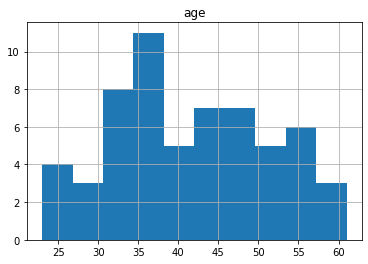

In [21]:
test_window_df.hist(column = 'age')

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

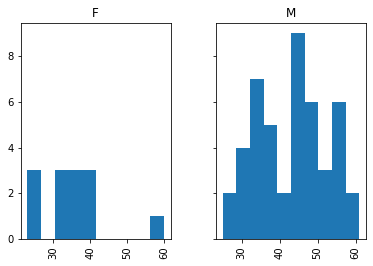

In [22]:
test_window_df.hist(column = 'age', by=test_window_df['gender'], sharey=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

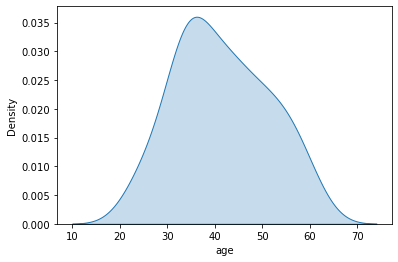

In [23]:
sns.kdeplot(test_window_df['age'], shade=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

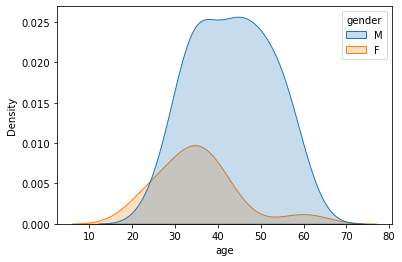

In [24]:
sns.kdeplot(test_window_df['age'], shade=True, hue = test_window_df['gender'])

<AxesSubplot:ylabel='None'>

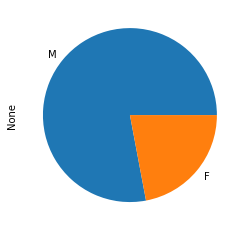

In [25]:
gender_counts = pd.value_counts(test_window_df['gender'].values, sort=True)
gender_counts.plot.pie()

<AxesSubplot:>

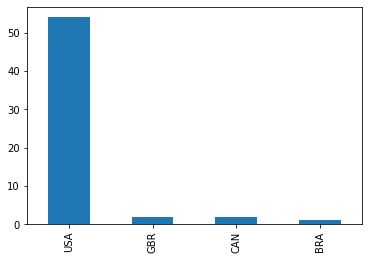

In [26]:
country_counts = pd.value_counts(test_window_df['country'].values, sort=True)
country_counts.plot.bar()

<AxesSubplot:ylabel='Frequency'>

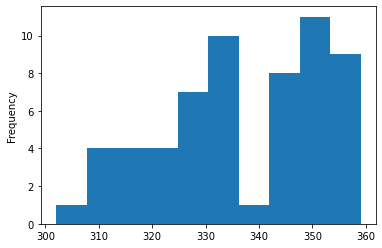

In [27]:
test_window_df['official_time'].astype('timedelta64[m]').plot.hist()

<AxesSubplot:xlabel='pace_per_mile', ylabel='Density'>

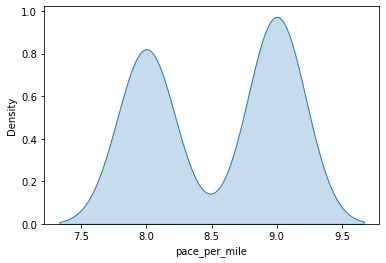

In [28]:
sns.kdeplot(test_window_df['pace_per_mile'].astype('timedelta64[m]'), shade=True)

<AxesSubplot:xlabel='pace_per_mile', ylabel='Density'>

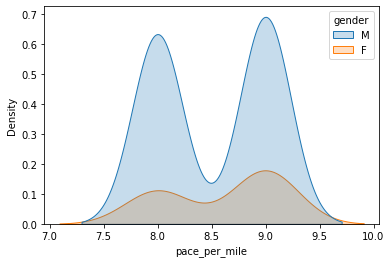

In [29]:
sns.kdeplot(test_window_df['pace_per_mile'].astype('timedelta64[m]'), hue=df['gender'], shade=True)

In [30]:
# Want to form a window around a specified finisher.
# Need to match this object type.
pd.to_timedelta(30, unit = 'm')

Timedelta('0 days 00:30:00')

In [31]:
target_runner = 'Jack Craft'
half_window = pd.to_timedelta(10, unit = 'm')
window_center = pd.to_timedelta(df.loc[df['name'] == target_runner]['official_time'].values[0])
window_max = window_center + half_window
window_min = window_center - half_window

In [32]:
half_window

Timedelta('0 days 00:10:00')

In [33]:
window_center

Timedelta('0 days 07:07:39')

In [34]:
window_max

Timedelta('0 days 07:17:39')

In [35]:
window_min

Timedelta('0 days 06:57:39')

In [36]:
finish_buddies_df = df[(df['official_time'] < window_max) & (df['official_time'] > window_min)]
finish_buddies_df.describe()

,age,bib,official_time,pace_per_mile,place_overall,place_gender,place_age-group,place_country,place_age‐graded,net_place,latitude,longitude
count,47.000000,47.000000,47,47,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,47.000000
mean,42.085106,282.404255,0 days 07:08:48.680851063,0 days 00:11:30.595744680,200.000000,117.723404,15.680851,127.638298,0.0,200.000000,40.982981,-74.054160
std,10.690975,143.978812,0 days 00:06:37.524246259,0 days 00:00:10.719059770,13.711309,53.028992,9.677644,57.548628,0.0,13.711309,1.145761,3.008432
min,23.000000,64.000000,0 days 06:57:58,0 days 00:11:13,177.000000,38.000000,1.000000,1.000000,0.0,177.000000,38.670327,-89.984548
25%,33.500000,169.000000,0 days 07:02:50,0 days 00:11:21,188.500000,49.500000,6.500000,137.500000,0.0,188.500000,40.650104,-74.077810
50%,43.000000,264.000000,0 days 07:09:16,0 days 00:11:31,200.000000,147.000000,18.000000,149.000000,0.0,200.000000,40.712728,-73.972638
75%,50.000000,415.000000,0 days 07:15:06,0 days 00:11:41,211.500000,158.500000,24.500000,160.500000,0.0,211.500000,40.810239,-73.862181
max,65.000000,529.000000,0 days 07:17:29,0 days 00:11:45,223.000000,170.000000,32.000000,172.000000,0.0,223.000000,44.543483,-68.200726


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

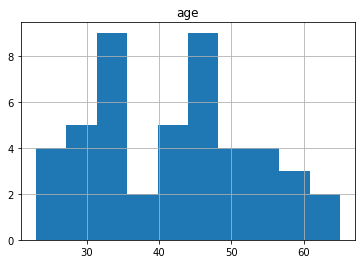

In [37]:
finish_buddies_df.hist(column = 'age')

<AxesSubplot:xlabel='age', ylabel='Density'>

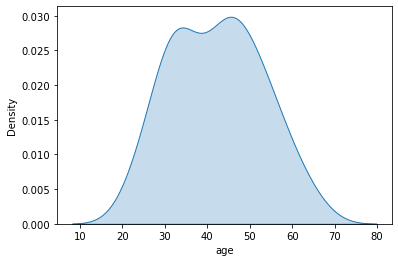

In [38]:
sns.kdeplot(finish_buddies_df['age'], shade=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

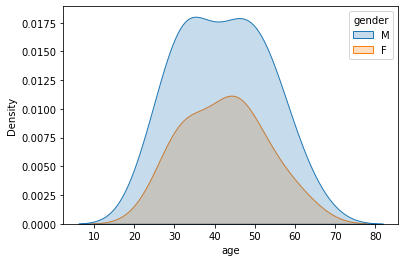

In [39]:
sns.kdeplot(finish_buddies_df['age'], shade=True, hue = finish_buddies_df['gender'])

<AxesSubplot:ylabel='None'>

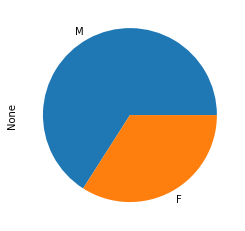

In [40]:
gender_counts = pd.value_counts(finish_buddies_df['gender'].values, sort=True)
gender_counts.plot.pie()

<AxesSubplot:>

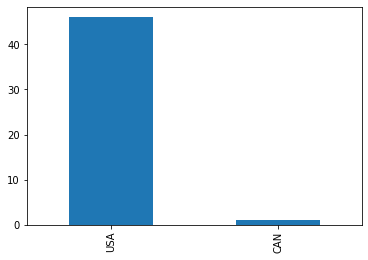

In [41]:
country_counts = pd.value_counts(finish_buddies_df['country'].values, sort=True)
country_counts.plot.bar()

<AxesSubplot:ylabel='Frequency'>

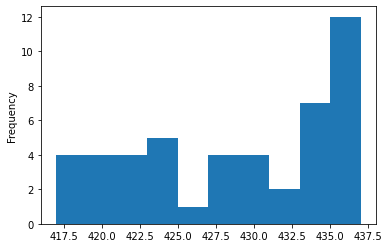

In [42]:
finish_buddies_df['official_time'].astype('timedelta64[m]').plot.hist()

<AxesSubplot:xlabel='official_time', ylabel='Density'>

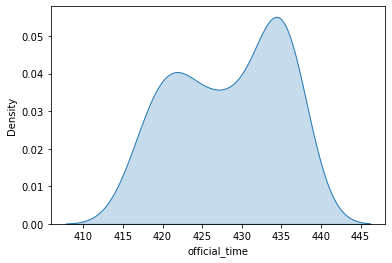

In [43]:
sns.kdeplot(finish_buddies_df['official_time'].astype('timedelta64[m]'), shade=True)

<AxesSubplot:xlabel='official_time', ylabel='Density'>

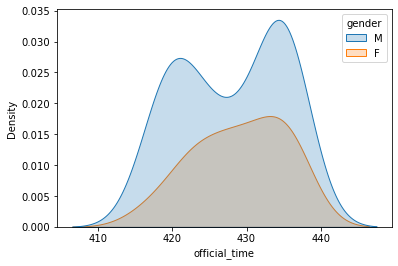

In [44]:
sns.kdeplot(finish_buddies_df['official_time'].astype('timedelta64[m]'), shade=True, hue=finish_buddies_df['gender'])

In [45]:
### Map the finish buddies!
import matplotlib.pyplot as plt
import folium

In [46]:
mapping_df = finish_buddies_df[pd.notnull(finish_buddies_df["location"])]

In [47]:
map1 = folium.Map(
    location=[40.7128, -74.0060],
    tiles='cartodbpositron',
    zoom_start=12,
)
mapping_df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], tooltip=row["address"]).add_to(map1), axis=1)
map1

## Where are runners from?
(This was moved to the 'Geocoder' notebook.)

# Checking completeness

I would like to know if the race data is complete, i.e. has every finisher been captured. We can check the place numbers to see if they form a numeric sequence from 1st place to last place. There should be no gaps. There may be duplicates or triplicates due to different classifications (runners, wheelchair, handcycle) mixed together.

Some ideas:
1. Ignore the duplicates and look for gaps only. Could miss a gap in the runners if a wheelchair is filling it and vice versa.
2. Check to make sure the duplicates are also sequential, i.e. there are no gaps in the duplicates.
3. Infer athlete classification during scraping. Note that athlete classification is not explicitly stated in the race results. See https://results.nyrr.org/event/M2019/result/251 as an example.
4. Infer athlete classification during cleaning. See https://results.nyrr.org/event/M2019/result/251, https://results.nyrr.org/event/M2019/result/101, and https://results.nyrr.org/event/M2019/result/341 as examples.

### Finding Gaps

In [48]:
def missing_elements(L):
  
    original_list = [x for x in range(min(L), max(L)+1)]
    num_list = set(L)
    return (list(num_list ^ set(original_list)))

In [49]:
import random
L1 = [10,11,13,14,15,16,17,19,20] # missing 12 and 18
L2 = [10,11,13,14,15,16,16,17,18,20] # missing 12 and 19, has an extra 16
L3 = L1 + L2
random.shuffle(L3) # missing 12, 2 of everything else except 18 and 19, 3 16's, random order.

In [50]:
# Test it out
print(f"List 1 result:{missing_elements(L1)}")
print(f"List 2 result:{missing_elements(L2)}")
print(f"List 3 result:{missing_elements(L3)}")

List 1 result:[12, 18]
List 2 result:[12, 19]
List 3 result:[12]


In [51]:
# Try it on the list of finisher places. This should be empty if we found all the finishers.
print(missing_elements(df.place_overall.tolist()))

[]


In [52]:
# Try it on the list of bib numbers. This should not be empty.
print(missing_elements(df.bib.tolist()))

[2, 3, 10, 13, 14, 15, 16, 17, 20, 26, 30, 36, 39, 46, 61, 62, 67, 72, 83, 85, 88, 90, 91, 94, 100, 102, 105, 111, 118, 122, 125, 128, 129, 130, 131, 132, 135, 136, 137, 139, 151, 152, 159, 173, 181, 193, 195, 200, 201, 212, 215, 217, 224, 225, 226, 240, 247, 248, 250, 253, 255, 260, 267, 276, 281, 285, 287, 288, 294, 295, 297, 298, 301, 313, 320, 321, 323, 325, 329, 335, 340, 342, 356, 376, 377, 379, 380, 387, 391, 399, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 431, 435, 439, 440, 442, 443, 444, 446, 447, 448, 449, 452, 456, 459, 460, 461, 465, 472, 475, 485, 487, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 504, 513, 514, 515, 519, 526]
